In [ ]:
! pip install scikit-bio

In [3]:
# import skbio.stats.composition as cp
import numpy as np
import matplotlib.pyplot as plt
import os
import skbio.stats.composition as cp

from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline


In [4]:
os.chdir('/content/drive/MyDrive')

In [5]:
otu_mat = np.load('/content/drive/MyDrive/provided_OTU_uniquified.npy')

In [6]:
# filter otu
drop_col = []
for j in range(otu_mat.shape[1]):
    if otu_mat[:,j].max() < 0.001:
        drop_col.append(j)

In [7]:
otu_mat_flt = np.delete(otu_mat, drop_col, axis=1)

In [8]:
otu_mat_flt.sum(axis=1)

array([0.99921456, 1.00000005, 1.00000005, ..., 0.99999996, 0.99953194,
       1.        ])

In [9]:
# read bmi cat
with open('Project_542/provided_OTU_bmi_cat.txt') as f:
    bmi = f.readlines()
bmi = [i.strip('\n') for i in bmi]
bmi = [i.split(',') for i in bmi]
bmi = bmi[1:]

In [10]:
# attach index to each category
cats = {
    'Normal': [],
    'Obese': [],
    'Overweight': [],
    'Underweight': []
}    # each contains the corresponding indexes
for item in bmi:
    cats[item[1]].append(int(item[0]))

In [11]:
np.count_nonzero(otu_mat_flt) / (otu_mat_flt.shape[0] * otu_mat_flt.shape[1])
# np.count_nonzero(otu_mat) / (otu_mat.shape[0] * otu_mat.shape[1])

0.026671876186242338

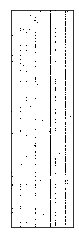

In [ ]:
fig,ax = plt.subplots(1)

ax.spy(otu_mat_flt)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('Project_542/sparse_filter.png', dpi=300)

In [12]:
otu_mat = cp.multiplicative_replacement(otu_mat_flt)    # zreo replacement
otu_mat = cp.clr(otu_mat)    # log transform

In [13]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(otu_mat)
otu_mat_std = scaler.transform(otu_mat)    # scaled otu matrix


In [14]:
# PCA
n_pc = 4
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(otu_mat_std)    # project the original data into the PCA space

Text(0, 0.5, 'Variance explained ratio')

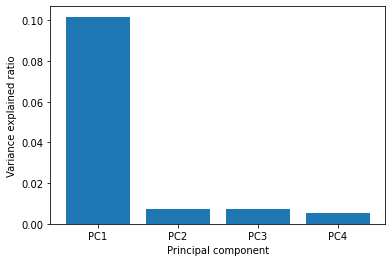

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(pca.explained_variance_ratio_)
plt.bar(x, height)
plt.xlabel('Principal component')
plt.ylabel('Variance explained ratio')
# plt.savefig('Project_542/scree_plot_fliter.png', dpi=300)

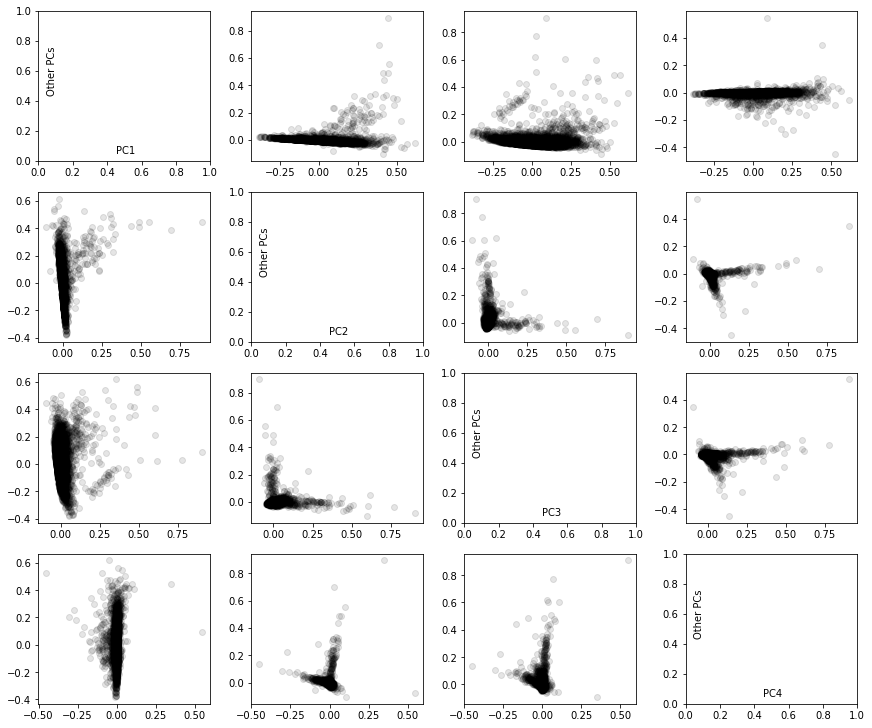

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(12, 10))

for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
plt.savefig('pair-PCA.png', dpi=300)

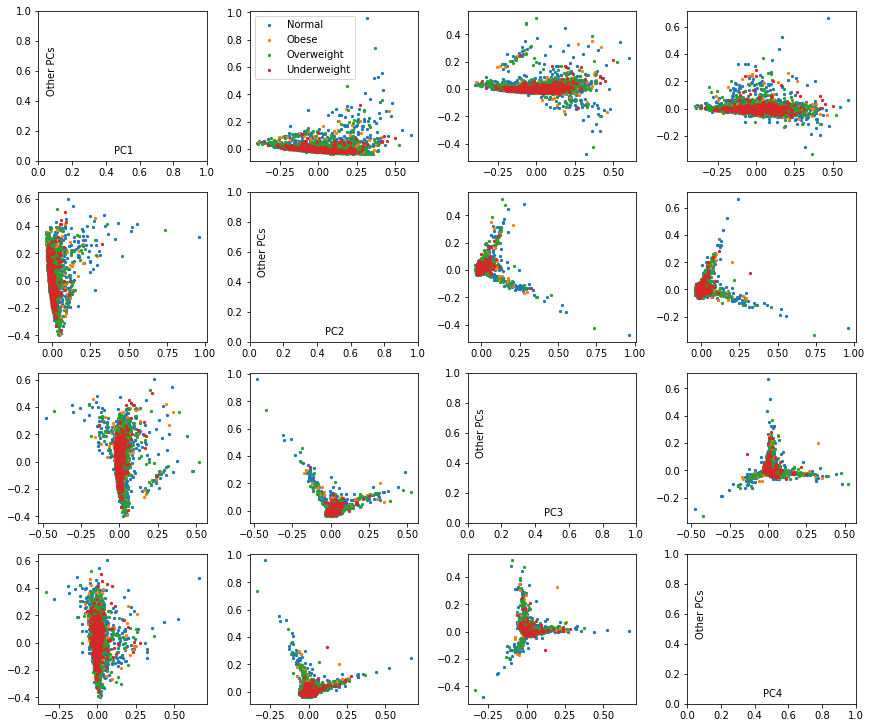

In [15]:
# pair-wise pca with bmi cat

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(12, 10))
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            pcx = pcx * scalex
            pcy = pcy * scaley
            ax[i,j].scatter(pcx[cats['Normal']], pcy[cats['Normal']], color=color_list[0], s=5, label='Normal')
            ax[i,j].scatter(pcx[cats['Obese']], pcy[cats['Obese']], color=color_list[1], s=5, label='Obese')
            ax[i,j].scatter(pcx[cats['Overweight']], pcy[cats['Overweight']], color=color_list[2], s=5, label='Overweight')
            ax[i,j].scatter(pcx[cats['Underweight']], pcy[cats['Underweight']], color=color_list[3], s=5, label='Underweight')
    ax[0,1].legend()
# plt.show()
# plt.savefig('Project_542/pair-PCA-bmi-filter.png', dpi=300)

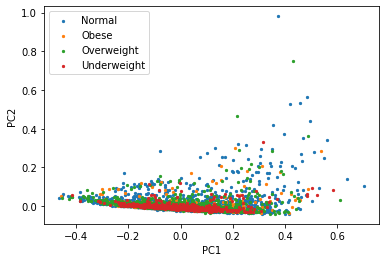

In [35]:
# Biplot
fig, ax = plt.subplots()
x_pc = 0    # PC1 on xaxis    
y_pc = 1    # PC2 on yaxis
pcx = pca_mat[:,x_pc]    
pcy = pca_mat[:,y_pc]    
scale1 = 1.0/(pcx.max() - pcx.min())
scale2 = 1.0/(pcy.max() - pcy.min())
pcx = pcx * scalex
pcy = pcy * scaley
ax.scatter(pcx[cats['Normal']], pcy[cats['Normal']], color=color_list[0], s=5, label='Normal')
ax.scatter(pcx[cats['Obese']], pcy[cats['Obese']], color=color_list[1], s=5, label='Obese')
ax.scatter(pcx[cats['Overweight']], pcy[cats['Overweight']], color=color_list[2], s=5, label='Overweight')
ax.scatter(pcx[cats['Underweight']], pcy[cats['Underweight']], color=color_list[3], s=5, label='Underweight')
ax.legend()

ax.set_xlabel(f'PC{x_pc+1}')
ax.set_ylabel(f'PC{y_pc+1}')
plt.savefig('Project_542/pc1-pc2.png', dpi=300)
# plt.show()

In [28]:
n_cls = 4    # number of clusters
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
title_list = ['KMeans', 'MiniBatch KMeans', 'Hierachical Clustering']
pca_list = ['without PCA', 'based on PCA']

In [29]:
# kmeans clustering
# kmeans_model = KMeans(n_clusters=n_cls, init='random').fit(otu_mat)
# kmeans_model = KMeans(n_clusters=n_cls, init='random').fit(pca_mat[:,[x_pc, y_pc]])
# kmeans_model = KMeans(n_clusters=n_cls, init='random').fit(otu_mat)

In [30]:
# kmeans model for plot
kmeans_model_1 = KMeans(n_clusters=n_cls, init='random').fit(otu_mat)    # cluster without PCA
kmeans_model_2 = KMeans(n_clusters=n_cls, init='random').fit(pca_mat[:,[x_pc, y_pc]])    # cluster based on PCA
kmeans_model_list = [kmeans_model_1, kmeans_model_2]

In [31]:
# hierarchical clustering for plot
hc_model_1 = AgglomerativeClustering(n_clusters=n_cls, linkage='ward').fit(otu_mat)
hc_model_2 = AgglomerativeClustering(n_clusters=n_cls, linkage='ward').fit(pca_mat[:,[x_pc, y_pc]])
hc_model_list = [hc_model_1, hc_model_2]

In [32]:
# minibatch kmeans for plot
bsize = 5
mbkmeans_model_1 = MiniBatchKMeans(n_clusters=n_cls, init='random', batch_size=bsize).fit(otu_mat)
mbkmeans_model_2 = MiniBatchKMeans(n_clusters=n_cls, init='random', batch_size=bsize).fit(pca_mat[:,[x_pc, y_pc]])
mbkmeans_model_list = [mbkmeans_model_1, mbkmeans_model_2]

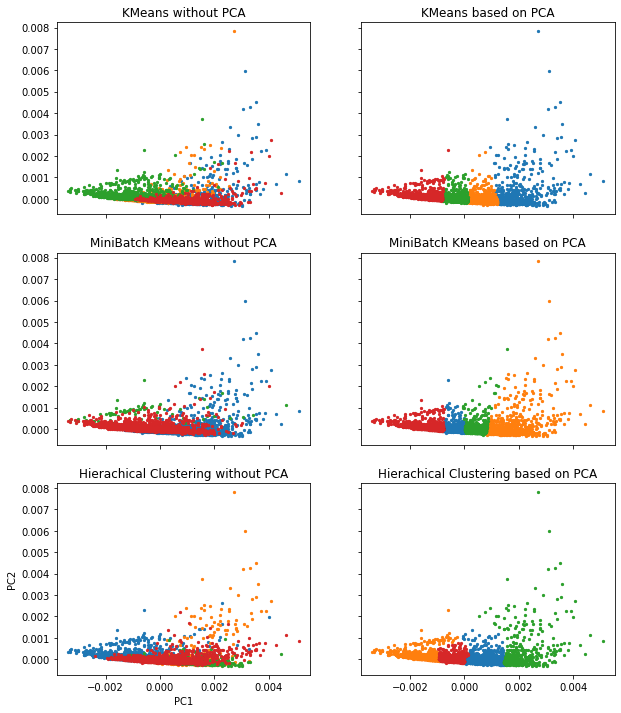

In [34]:
model_list = [kmeans_model_list, mbkmeans_model_list, hc_model_list]
fig, ax = plt.subplots(figsize=(10, 12), nrows=3, ncols=2, sharex=True, sharey=True)

for i in range(3):
    for j in range(2):
        label = model_list[i][j].labels_
        index = []
        for k in range(n_cls):
            index_k = [p for p,q in enumerate(list(label)) if q==k]
            index.append(index_k)
        for k in range(n_cls):
            ax[i,j].scatter(pcx[index[k]]*scale1, pcy[index[k]]*scale2, color=color_list[k], s=5)
            ax[i,j].set_title(f'{title_list[i]} {pca_list[j]}')
ax[2,0].set_xlabel('PC1')
ax[2,0].set_ylabel('PC2')
plt.savefig('Project_542/clusters_4bmi.png', dpi=300)

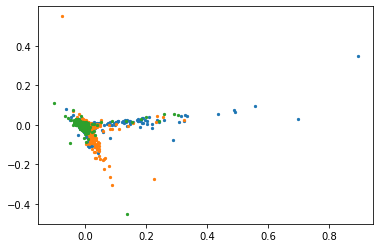

In [ ]:
# visualize kmeans clustering in PC1 and PC2
label_km = kmeans_model.labels_
index_km = []    # list of index to each point label
for i in range(n_cls):
    index_i = [k for k,j in enumerate(list(label_km)) if j==i]
    index_km.append(index_i)

for i in range(n_cls):
    plt.scatter(pcx[index_km[i]]*scale1, pcy[index_km[i]]*scale2, color=color_list[i], s=5)
plt.show()

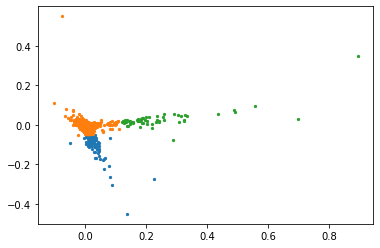

In [ ]:
# visualize kmeans clustering in PC1 and PC2
label_km = kmeans_model.labels_
index_km = []    # list of index to each point label
for i in range(n_cls):
    index_i = [k for k,j in enumerate(list(label_km)) if j==i]
    index_km.append(index_i)

for i in range(n_cls):
    plt.scatter(pcx[index_km[i]]*scale1, pcy[index_km[i]]*scale2, color=color_list[i], s=5)
plt.show()

In [ ]:
# hierarchical clustering
hc_model = AgglomerativeClustering(n_clusters=n_cls, linkage='ward').fit(pca_mat[:,[x_pc, y_pc]])    # relatively good
# hc_model = AgglomerativeClustering(n_clusters=n_cls, linkage='complete').fit(pca_mat[:,[x_pc, y_pc]])    
# hc_model = AgglomerativeClustering(n_clusters=n_cls, linkage='average').fit(pca_mat[:,[x_pc, y_pc]])    
# hc_model = AgglomerativeClustering(n_clusters=n_cls, linkage='single').fit(pca_mat[:,[x_pc, y_pc]])    

In [38]:
# Hierarchical clustering with different linkage methods
hc_models = []
link = ['ward', 'complete', 'average', 'single']
for item in link:
    # hc_models.append(AgglomerativeClustering(n_clusters=n_cls, linkage=item).fit(pca_mat[:,[x_pc, y_pc]]))
    hc_models.append(AgglomerativeClustering(n_clusters=n_cls, linkage=item).fit(otu_mat))

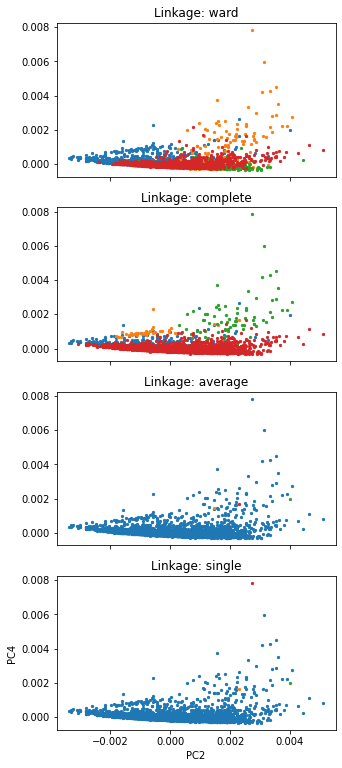

In [40]:
fig, ax = plt.subplots(figsize=(5, 13), nrows=4, ncols=1, sharex=True, sharey=True)

for i in range(4):
    label = hc_models[i].labels_
    index = []
    for k in range(n_cls):
        index_k = [p for p,q in enumerate(list(label)) if q==k]
        index.append(index_k)
    for k in range(n_cls):
        ax[i].scatter(pcx[index[k]]*scale1, pcy[index[k]]*scale2, color=color_list[k], s=5)
        ax[i].set_title(f'Linkage: {link[i]}')
ax[3].set_xlabel('PC2')
ax[3].set_ylabel('PC4')
plt.savefig('Project_542/Hierachical_linkages_pc1pc2.png', dpi=300)

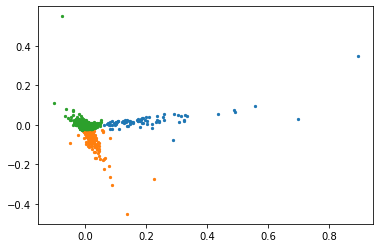

In [ ]:
label_hc = hc_model.labels_
index_hc = []    # list of index to each point label
for i in range(n_cls):
    index_i = [k for k,j in enumerate(list(label_hc)) if j==i]
    index_hc.append(index_i)

for i in range(n_cls):
    plt.scatter(pcx[index_hc[i]]*scale1, pcy[index_hc[i]]*scale2, color=color_list[i], s=5)
plt.show()

In [ ]:
# spectral clustering

# sc_model = SpectralClustering(n_clusters=n_cls).fit(pca_mat[:,[x_pc, y_pc]])

# DBSCAN clustering
dbscan_model = DBSCAN(eps=20).fit(pca_mat[:,[x_pc, y_pc]])

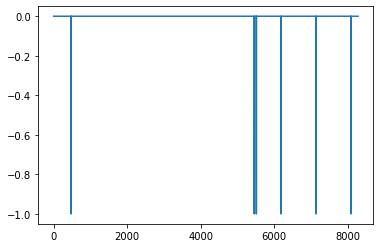

In [ ]:
plt.plot(dbscan_model.labels_)

In [ ]:
label_sc = sc_model.labels_
index_sc = []    # list of index to each point label
for i in range(n_cls):
    index_i = [k for k,j in enumerate(list(label_sc)) if j==i]
    index_sc.append(index_i)

for i in range(n_cls):
    plt.scatter(pcx[index_sc[i]]*scale1, pcy[index_sc[i]]*scale2, color=color_list[i], s=5)
plt.show()

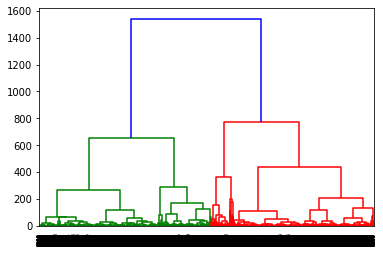

In [44]:
# Dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_mat[:,[x_pc, y_pc]])

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode='level')
plt.savefig('Project_542/dendrograom_pc1pc2.png', dpi=300)